## Comparación de diferentes métodos de estimación de parámetros de la regresión lineal

### Modelo de regresión lineal

$$Y=b+w_{0}X_{0}+ \cdots + w_{n-1}X_{n-1}+\varepsilon $$

Siendo $Y$ la variable respuesta, $X_{0},\cdots, X_{n-1}$ las variables explicativa, $b, w_{0},\cdots, w_{n-1}$ los parámetros y $\varepsilon$ el error.


Una muestra bajo diseño fijo se puede expresar de la forma
$$
\left(\begin{array}{c}
Y_1 \\
\vdots \\
Y_m
\end{array}\right)=\left(\begin{array}{ccccc}
1 & x_{0,0} & \cdots & x_{0, n-1} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{m-1, 0} & \cdots & x_{m-1, n-1} \\

\end{array}\right) \cdot\left(\begin{array}{c}
b \\
w_0 \\
\vdots \\
w_{n-1}
\end{array}\right)+\left(\begin{array}{c}
\varepsilon_1 \\
\vdots \\
\varepsilon_n
\end{array}\right)
$$

O lo que es lo mismo $$Y=X\beta+\varepsilon$$


### Estimación de parámetros mediante ecuaciones normales

Para estimar el vector de parámetros, $\beta$, escogeremos como estimador aquel $\hat{\beta}$ donde se alcance 
$$ \min_{\beta} \sum_{i=1}^{m}(Y_i-x_i\beta)^2$$ 
con $x_i$ la fila m-ésima de la matriz de diseño
Equivalentemente
$$ \min_{\beta} (Y-X \beta)^{t}(Y-X \beta) $$

Derivando respecto $\beta$ e igualando a 0 llegamos a las ecuaciones normales

$$X^{t}X\beta=X^t\beta$$

Entonces nuestro estimador $\hat{\beta}$ será $$ \hat{\beta}=(X^tX)^{-1}X^{t}Y $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
def est_min_cuad(X,Y):
    """
    Estimación de parámetros por mínimos cuadrados
    input:
    X array (m,n)
    Y array (m,) o similar, cualquiera funciona al hacer el reshape

    output:

    beta_hat array (n,1)
    
    
    """
    
    m=X.shape[0]
    col=np.ones(m)
    col=col.reshape(-1,1)
    X=np.concatenate((col, X), axis=1)
    
    #beta_hat=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y.reshape(-1,1))
    beta_hat=np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@Y.reshape(-1,1)
    return beta_hat

    



In [3]:
data = np.loadtxt("houses.txt", delimiter=',')
X1 = data[:,:4]
Y1 = data[:,4]
m1,n1=X1.shape
beta_hat=est_min_cuad(X1,Y1)
b_mq=beta_hat[0,:]
w_mq=beta_hat[1:,:]
print('el b estimado es',b_mq)
for i in range(n1):
    coef='w_'+str(i)
    print('el ',coef,'estimado es',w_mq[i])

el b estimado es [221.50226367]
el  w_0 estimado es [0.26836643]
el  w_1 estimado es [-32.90362407]
el  w_2 estimado es [-67.28804158]
el  w_3 estimado es [-1.46516763]


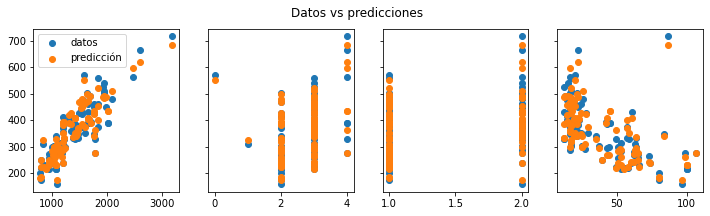

In [4]:
yp = np.zeros(m1)
for i in range(m1):
    yp[i] = np.dot(X1[i], w_mq) + b_mq   
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X1[:,i],Y1, label = 'datos')
    ax[i].scatter(X1[:,i],yp, label = 'predicción')
    ax[0].legend();
fig.suptitle("Datos vs predicciones")
plt.show()



### Estimación de parámetros mediante descenso de gradiente


Como alternativa a las ecuaciones normales, podemos usar un método de descenso de gradiente. El objetivo es crear un algoritmo que nos vaya actualizando los coeficientes y reduciendo el coste en cada iteración. Para esto, se va recorriendo w y b en la dirección inversa al gradiente(ya que este representa la dirección de máximo crecimiento), estos pasos serán más grandes o más pequeños dependiendo del learning rate, $\alpha$ . De esta forma nos vamos acercando al mínimo de la función coste, siempre que esta sea convexa y $\alpha$ tenga un valor adecuado.

#### Función coste


\begin{align*}
& J(\mathbf{w}, b)=\frac{1}{2 m} \sum_{i=0}^{m-1}\left(f_{\mathbf{w}, b}\left(\mathbf{x}^{(i)}\right)-Y_{i}\right)^2 \\
& f_{\mathbf{w}, b}\left(\mathbf{x}^{(i)}\right)=\mathbf{w} \cdot \mathbf{x}^{(i)}+b
\end{align*}


Siendo $\mathbf{x}^{(i)}$ la fila i-ésima de $X$


#### Descenso de gradiente

\begin{align*}
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \text{ para }  j=0,\cdots ,n-1\\
& b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \\
& \text{Repetir hasta convergencia}
\end{align*}


Siendo el gradiente:
\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}   \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}


In [5]:
def f_coste(X,Y,w,b):
    """
    Calcula el coste j_wb

    input:
    X array (m,n)
    w array (n,) 
    b scalar
    
    output:
    j_wb scalar

    arr = np.concatenate([arr, col], axis=1)    
    """
    m=X.shape[0]

    
    w_col=w.reshape(-1,1)
    error=np.matmul(X,w_col)+b-Y.reshape(-1,1)
    #print(error)
    error=np.squeeze(error)
    #print(error)
    j_wb=(np.dot(error,error))/(2*m) 
   

    """ error=np.zeros(m)
    for i in range(m):
        error[i]=np.dot(X[i,:],w)+b-Y[i]
    mse=(np.dot(error,error))/(2*m)
 """
    return j_wb
    




In [6]:
def gradiente_l(X,Y,W,b):
    """
    Computa el gradiente del coste j_wb

    input:
    X array (m,n)
    Y array (m,)
    W array (n,)
    b scalar

    output:
    dj_dw array (n,)
    dj_db scalar
    """
    m=X.shape[0]   
    W_col=W.reshape(-1,1)
    error=np.matmul(X,W_col)+b-Y.reshape(-1,1)
    error=np.squeeze(error)
    dj_db=sum(error)/m
    dj_dw=error@X
    dj_dw=dj_dw/m

    return dj_dw,dj_db

In [7]:
def descenso_gradiente(X, Y, W_in, b_in, alfa, it_max, f_coste, gradiente_l):
    """
    Estimación de w y b mediante descenso de gradiente

    input:
    X array (m,n)
    Y array (m,)
    W_in array (n,)
    b_in scalar
    alfa scalar
    it_max int
    f_coste función coste, j_wb
    gradiente_t función que calcula el gradiente de la función coste

    output:
    w array(n,)
    b scalar


    """
    w=W_in
    b=b_in
    for i in range(it_max):
        dj_dw,dj_db = gradiente_l(X, Y, w, b)
        w=w-alfa*dj_dw
        b=b-alfa*dj_db


    return w,b

In [8]:
def descenso_gradiente2(X, Y, W_in, b_in, alfa, it_max, f_coste, gradiente_l):
    """
    Estimación de w y b mediante descenso de gradiente con almacenamiento de información en ciertos pasos
    input:
    X array (m,n)
    Y array (m,)
    W_in array (n,)
    b_in scalar
    alfa scalar
    it_max int
    f_coste función coste, j_wb
    gradiente_t función que calcula el gradiente de la función coste

    output:
    w array(n,)
    b scalar
    it_info pandas data frame que recoge los datos en 100 pasos uniformemente espaciados


    """
    m,n=X.shape
    w=W_in
    b=b_in
    columnas=['iteraciones','coste']
    for i in range(n):
        columnas.append('w_'+str(i))
    columnas.append('b')
    it_info=pd.DataFrame(columns=columnas)



    for i in range(it_max):
        dj_dw,dj_db = gradiente_l(X, Y, w, b)
        w=w-alfa*dj_dw
        b=b-alfa*dj_db

        if i == 0 or i % math.ceil(it_max/100) == 0:
            coste=f_coste(X,Y,w,b)
            w_list=w.tolist()
            it_info.loc[i]  = [i, coste]+ w_list+[ b]

    return it_info,w,b

Obtengamos los coeficientes para el data set de antes mediante descenso de gradiente

In [9]:

w_in=np.zeros(n1)
b_in=0.
alfa=1.0e-10
it_max=10000

w_dg, b_dg=descenso_gradiente(X1, Y1, w_in, b_in, alfa, it_max, f_coste, gradiente_l)

print(w_mq,b_mq)
print(w_dg,b_dg)

print('el coste para los coeficientes estimados por mínimos cuadrados es ', f_coste(X1,Y1,w_mq,b_mq))
print('el coste para los coeficientes estimados por descenso de gradiente es ', f_coste(X1,Y1,w_dg,b_dg))





[[  0.26836643]
 [-32.90362407]
 [-67.28804158]
 [ -1.46516763]] [221.50226367]
[2.24085611e-01 4.05018148e-04 2.05826950e-04 4.69912397e-03] 0.00015049596377980992
el coste para los coeficientes estimados por mínimos cuadrados es  219.7113017649621
el coste para los coeficientes estimados por descenso de gradiente es  2474.522148788117


#### Rápidez de convergencia para diferentes alfas

el coste para alfa1, alfa2, alfa 3 es   1565.1751829820182 1530.4674878668843 1374.77163735132


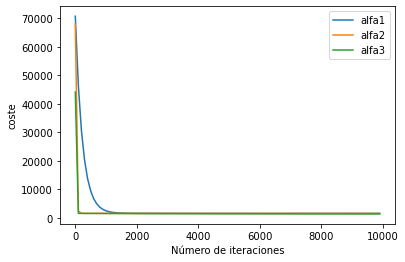

In [10]:
alfa1=1.0e-9
alfa2=1.0e-8
alfa3=1.0e-7
descenso1,w_dg1, b_dg1=descenso_gradiente2(X1, Y1, w_in, b_in, alfa1, it_max, f_coste, gradiente_l)
descenso2,w_dg2, b_dg2=descenso_gradiente2(X1, Y1, w_in, b_in, alfa2, it_max, f_coste, gradiente_l)
descenso3,w_dg3, b_dg3=descenso_gradiente2(X1, Y1, w_in, b_in, alfa3, it_max, f_coste, gradiente_l)
plt.plot(descenso1['iteraciones'],descenso1['coste'],label="alfa1")
plt.plot(descenso2['iteraciones'],descenso2['coste'],label="alfa2")
plt.plot(descenso3['iteraciones'],descenso3['coste'],label="alfa3")
plt.legend()
plt.ylabel('coste')
plt.xlabel('Número de iteraciones')

print('el coste para alfa1, alfa2, alfa 3 es  ', f_coste(X1,Y1,w_dg1,b_dg1),f_coste(X1,Y1,w_dg2,b_dg2),f_coste(X1,Y1,w_dg3,b_dg3))

Como vemos en la gráfica la velocidad de convergencia es muy alta, después de las 10000 iteraciones aún tenemos un error muy superior al de los coeficientes calculados con mínimos cuadrados.

#### Descenso de gradiente con datos normalizados

Con la normalización z-score, las columnas de $X$(es decir cada variable explicativa) tendrán media 0 y desviación típica 1. Para obtener esto, hay que aplicar a cada elemento:
$$ x_i,j=\frac{x_{i,j} - \mu_j}{\sigma_j}$$
siendo $\mu_j$ la media de la columna j y $\sigma_j$ su desviación típica

Esto ayuda a que el descenso de gradiente converja más rápido


In [11]:
def normalizacion_z(X):
    """
    input:
    X array (m,n)
    output:
    X_norm array (m,n)
    """
    m,n=X.shape
    mu = np.mean(X,axis=0)
    mu=mu.reshape(1,n) #pasamos de (n,) a (1,n) para hacer las operaciones por columnas
    sigma = np.std(X,axis=0)
    sigma=sigma.reshape(1,n)
    X_norm=(X-mu)/sigma
    return X_norm

Calculemos de nuevo los coeficientes con las variables explicativas normalizadas

In [12]:
X1_norm=normalizacion_z(X1)
alfa=1.0e-2
descenso_norm,w_dg_norm, b_dg_norm=descenso_gradiente2(X1_norm, Y1, w_in, b_in, alfa, it_max, f_coste, gradiente_l)
print('el coste para los coeficientes estimados por descenso de gradiente con datos normalizados es ', f_coste(X1_norm,Y1,w_dg_norm,b_dg_norm))



el coste para los coeficientes estimados por descenso de gradiente con datos normalizados es  219.7113017649619


Ahora sí que ha acercado bastante a la convergencia, el error es parecido al obtenido con las ecuaciones normales. Veamos las predicciones con estos coeficientes:

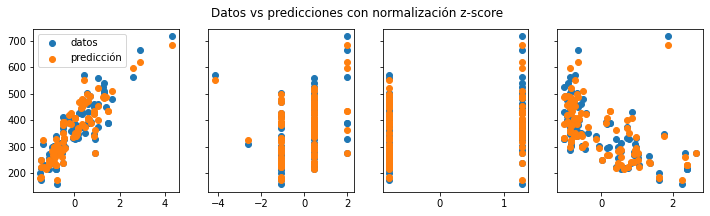

In [13]:
yp_dg = np.zeros(m1)
for i in range(m1):
    yp_dg[i] = np.dot(X1_norm[i], w_dg_norm) + b_dg_norm  
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X1_norm[:,i],Y1, label = 'datos')
    ax[i].scatter(X1_norm[:,i],yp, label = 'predicción')
    ax[0].legend();
fig.suptitle("Datos vs predicciones con normalización z-score")
plt.show()
